In [17]:
from xgboost import XGBClassifier
import  numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.metrics import  mean_absolute_error
import  matplotlib.pyplot as plt
from  skimage.transform import resize
from skimage import  color
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import itertools

In [18]:
import gradio

### extract the features

In [19]:
data = []
label = []

Path = []

df = pd.DataFrame()

In [20]:

def image(name, l, path,n):
    for i in range(n):
        x =path + name[i]
        img1 = cv2.imread(x)
        if img1 is not None:
            img_gray = color.rgb2gray(img1)
            img_resize = resize(img_gray, (100, 100), anti_aliasing=False)
            data.append(img_resize)
            label.append(l)
            Path.append(x)



In [21]:
Dogs =os.listdir("D:\code area\dog")
cats = os.listdir("D:\code area\cats")
turtle = os.listdir("D:\code area/turtle\data\images")

In [22]:

image(turtle,'turtle',"D:\code area/turtle\data\images/",1500)
len(data)

1500

In [23]:
image(Dogs,'Dog',"D:\code area\dog/",1500)



In [24]:
image(cats,'Cat',"D:\code area\cats/",3000)
len(data)

4500

In [25]:
#processi       ng the answers
encode =LabelEncoder()
Label = encode.fit_transform(label)

In [26]:
Data = np.array(data)
Data = Data.reshape(4500,10000)
df = pd.DataFrame(Data)
df['Label'] = Label
df["Path"] =Path

In [27]:
df.info

<bound method DataFrame.info of              0         1         2         3         4         5         6  \
0     0.511336  0.489844  0.507928  0.520941  0.529925  0.459089  0.447187   
1     0.320273  0.342063  0.360718  0.375264  0.399165  0.414055  0.431710   
2     0.010469  0.002745  0.001073  0.034279  0.060608  0.014905  0.011124   
3     0.711443  0.809100  0.622481  0.698269  0.669863  0.682249  0.760792   
4     0.549270  0.559934  0.562189  0.571171  0.582675  0.582675  0.591657   
...        ...       ...       ...       ...       ...       ...       ...   
4495  0.890262  0.857022  0.832693  0.824051  0.832727  0.827301  0.862229   
4496  0.085144  0.641287  0.601365  0.765537  0.930400  0.901307  0.870323   
4497  0.794308  0.795432  0.799355  0.802002  0.802002  0.805382  0.805924   
4498  0.239115  0.300658  0.266101  0.232450  0.393342  0.163739  0.316521   
4499  0.061082  0.105018  0.141356  0.076257  0.096937  0.195711  0.149569   

             7         8       

In [28]:
df

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,Label,Path
0,0.511336,0.489844,0.507928,0.520941,0.529925,0.459089,0.447187,0.447867,0.443242,0.440819,...,0.477840,0.403836,0.443820,0.453079,0.525094,0.504940,0.513984,0.474923,2,D:\code area/turtle\data\images/Image_1.jpg
1,0.320273,0.342063,0.360718,0.375264,0.399165,0.414055,0.431710,0.445156,0.462937,0.486136,...,0.294405,0.277021,0.209656,0.275141,0.263532,0.245706,0.207188,0.241046,2,D:\code area/turtle\data\images/Image_10.jpg
2,0.010469,0.002745,0.001073,0.034279,0.060608,0.014905,0.011124,0.001657,0.006306,0.146641,...,0.070018,0.244624,0.481410,0.846769,0.252278,0.101133,0.082613,0.101398,2,D:\code area/turtle\data\images/Image_100.jpg
3,0.711443,0.809100,0.622481,0.698269,0.669863,0.682249,0.760792,0.638801,0.800302,0.856945,...,0.449244,0.445231,0.436323,0.432684,0.428559,0.425994,0.437049,0.415802,2,D:\code area/turtle\data\images/Image_1000.jpg
4,0.549270,0.559934,0.562189,0.571171,0.582675,0.582675,0.591657,0.595296,0.600074,0.605967,...,0.381827,0.152796,0.258722,0.340145,0.385135,0.347245,0.371677,0.267363,2,D:\code area/turtle\data\images/Image_1001.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.890262,0.857022,0.832693,0.824051,0.832727,0.827301,0.862229,0.716853,0.788787,0.807831,...,0.207746,0.212073,0.209822,0.211448,0.217832,0.231463,0.229574,0.247253,0,D:\code area\cats/00000196_025.jpg
4496,0.085144,0.641287,0.601365,0.765537,0.930400,0.901307,0.870323,0.920543,0.928814,0.917848,...,0.610831,0.548732,0.781259,0.959171,0.964729,0.944181,0.931698,0.745867,0,D:\code area\cats/00000196_028.jpg
4497,0.794308,0.795432,0.799355,0.802002,0.802002,0.805382,0.805924,0.808720,0.808720,0.806904,...,0.139065,0.141015,0.146254,0.130560,0.127492,0.135707,0.127300,0.114596,0,D:\code area\cats/00000197_006.jpg
4498,0.239115,0.300658,0.266101,0.232450,0.393342,0.163739,0.316521,0.201250,0.293747,0.287615,...,0.631717,0.930091,0.953048,0.890469,0.735516,0.843484,0.864051,0.955588,0,D:\code area\cats/00000197_014.jpg


In [29]:
df = df.sample(frac=1)
df.sample()

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,Label,Path
727,0.630105,0.721354,0.655102,0.716829,0.700695,0.62817,0.614184,0.579621,0.617027,0.625433,...,0.782705,0.691405,0.684904,0.465063,0.437323,0.646735,0.570402,0.627914,2,D:\code area/turtle\data\images/Image_1653.jpg


In [30]:
### split the data
### now lets split the data
X , x_test , Y , y_test = train_test_split(df.loc[:,:9999],df['Label'],test_size=0.2,random_state=42,shuffle=True)
x_train , x_validation , y_train , y_validation = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)


In [31]:
        print("x_train:"+str(x_train.shape),",y_train:"+str(y_train.shape),',x_validion : '+str(x_validation.shape),",y_valiation : "+str(y_validation.shape), ",x_test : "+str(x_test.shape),",y_test :"+str(y_test.shape))

x_train:(2880, 10000) ,y_train:(2880,) ,x_validion : (720, 10000) ,y_valiation : (720,) ,x_test : (900, 10000) ,y_test :(900,)


In [32]:
Model = XGBClassifier()

In [33]:
Model.fit(x_train,y_train)

C:\Users\Shatot\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:57:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
perdict = Model.predict(x_train)
train_f = mean_absolute_error(y_true=y_train,y_pred=perdict)

train_f

0.0

In [35]:
predict = Model.predict(x_validation)
val_f =accuracy_score(y_true=y_validation,y_pred=predict)
val_f

0.7611111111111111

In [36]:
predict = Model.predict(x_test)
test_f =accuracy_score(y_true=y_test,y_pred=predict)
test_f*100

75.77777777777777

In [37]:
Label= ["dog","Cat","turtle"]

In [38]:
def pred_tree(nmuber_img):
    pred = Model.predict(df.iloc[nmuber_img-1:nmuber_img,:10000])
    Image = plt.imread(df.loc[nmuber_img,"Path"])
    plt.imshow(Image)
    plt.title(Label[pred[0]])
    plt.figure(figsize=(10,50))




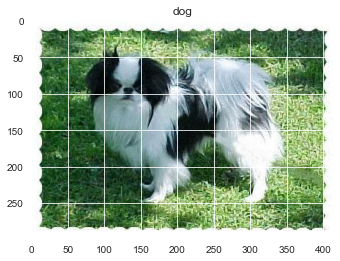

<Figure size 720x3600 with 0 Axes>

In [54]:
pred_tree(1700)

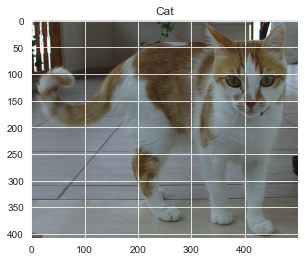

<Figure size 720x3600 with 0 Axes>

In [59]:
pred_tree(3010)

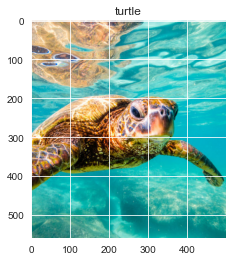

<Figure size 720x3600 with 0 Axes>

In [60]:
pred_tree(3)

In [40]:
cm = confusion_matrix(y_true=y_test, y_pred=predict)

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[183 104   5]
 [ 94 202   7]
 [  6   2 297]]


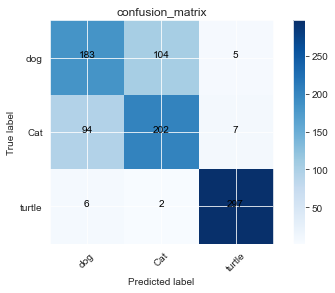

In [42]:

plot_confusion_matrix(cm=cm, classes=Label, title='confusion_matrix')

In [43]:
import gradio as gr

In [ ]:
import gradio as gr
def Dession_tree(img):
    img_gray = color.rgb2gray(img)
    img_resize = resize(img_gray, (100, 100), anti_aliasing=False)
    img_resize = np.array(img_resize)
    img_resize =img_resize.reshape(1,10000)
    pred = Model.predict(img_resize)
    return label[pred[0]-1]
def print_i(img):
    return print("hello")
images = gr.inputs.Image(shape=(300,300),label='input Image')
demo =gr.Interface(Dession_tree,inputs=  images,outputs='text',description="Random forest tree")
demo.launch(debug=True,share=True)


C:\Users\Shatot\anaconda3\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Shatot\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

Setting up a public link... we have recently upgraded the way public links are generated. If you encounter any problems, please report the issue and downgrade to gradio version 3.13.0
.
Running on public URL: https://d59d73df-be72-447a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d59d73df-be72-447a.gradio.live


In [46]:
Dession_tree("D:\code area/turtle\data\images\Image_1.jpg")

AttributeError: 'str' object has no attribute 'ndim'

In [61]:
### tree

In [62]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
perdiction = model_tree.predict(x_train)
train_t = mean_absolute_error(y_true=y_train,y_pred=perdict)

train_t

0.0

In [64]:
predict = model_tree.predict(x_validation)
val_t =accuracy_score(y_true=y_validation,y_pred=predict)
val_t

0.6805555555555556

In [66]:
prediction = model_tree.predict(x_test)
test_t =accuracy_score(y_true=y_test,y_pred=predict)
test_t

ValueError: Found input variables with inconsistent numbers of samples: [900, 720]

In [67]:
Label= ["Cat","dog","turtle"]

In [68]:
def pred_tree2(nmuber_img):
    pred = model_tree.predict(df.iloc[nmuber_img-1:nmuber_img,:10000])
    Image = plt.imread(df.loc[nmuber_img,"Path"])
    plt.imshow(Image)
    plt.title(Label[pred[0]])
    plt.figure(figsize=(10,50))




In [69]:
cm = confusion_matrix(y_true=y_test, y_pred=prediction)

Confusion matrix, without normalization
[[146 118  28]
 [133 142  28]
 [  3   1 301]]


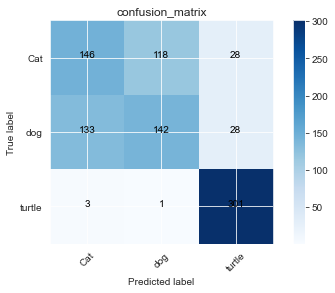

In [70]:
plot_confusion_matrix(cm=cm, classes=Label, title='confusion_matrix')

In [ ]:
import gradio as gr
def dession_tree(img):
    img_gray = color.rgb2gray(img)
    img_resize = resize(img_gray, (100, 100), anti_aliasing=False)
    img_resize = np.array(img_resize)
    img_resize =img_resize.reshape(1,10000)
    pred = model_tree.predict(img_resize)
    return label[pred[0]-1]
def print_i(img):
    return print("hello")
images = gr.inputs.Image(shape=(300,300),label='input Image')
demo =gr.Interface(dession_tree,inputs=  images,outputs='text',description="Tree tree")
demo.launch(debug=True,share=True)
